In [1]:
import re 
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
train = pd.read_csv("D:/PROJECT/Twitter sentiment Analysis/train_E6oV3lV.csv")
test = pd.read_csv("D:/PROJECT/Twitter sentiment Analysis/test_tweets_anuFYb8.csv")

In [4]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [5]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [6]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [7]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

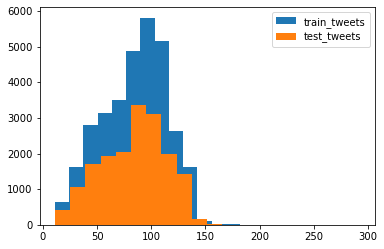

In [8]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train, bins=20, label = "train_tweets")
plt.hist(length_test, bins=20, label = "test_tweets")
plt.legend()
plt.show()

In [9]:
combi = pd.concat([train, test], ignore_index=True)
combi.shape

(49159, 3)

In [10]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [11]:
combi['tidy_tweet'] = combi['tweet'].apply(lambda x: remove_pattern(x, r'@[\w]*'))
combi.head()


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [12]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex = True)
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [13]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3]))

In [14]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [15]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [16]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

In [17]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet']=tokenized_tweet

In [18]:
pip install wordcloud

In [19]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


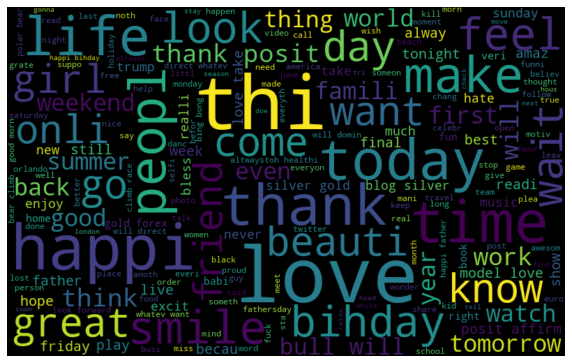

In [20]:
all_word=' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_word)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

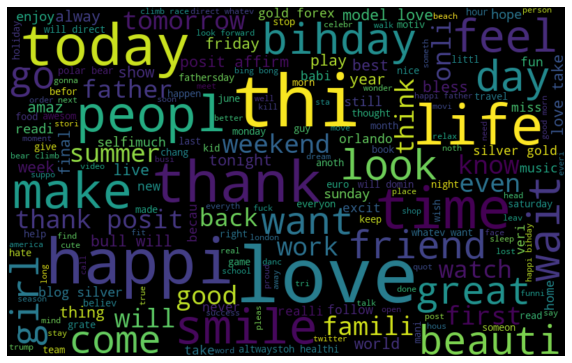

In [21]:
normal_words=' '.join([text for text in combi['tidy_tweet'][combi['label']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

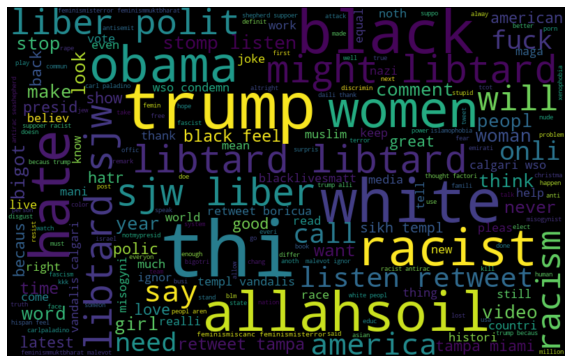

In [22]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==1]])
wordcloud=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

In [23]:
#function to collect hastag
def hashtag_extract(x):
    hashtags=[]
    #loop over the words in the tweet
    for i in x:
        ht=re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [24]:
#extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label']==0])
#extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label']==1])
#unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

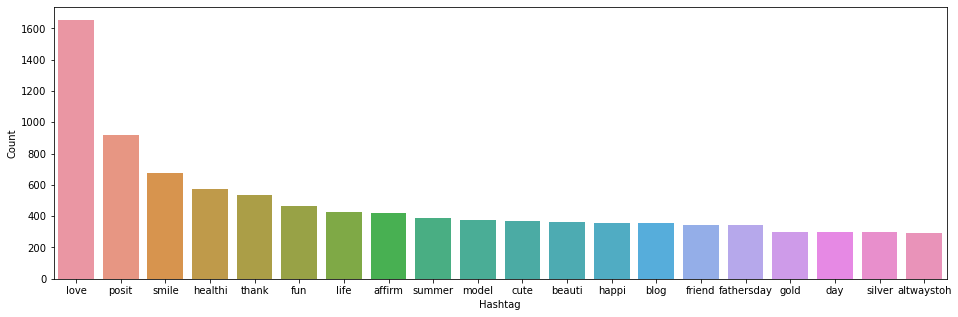

In [25]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag':list(a.keys()), 'Count':list(a.values())})

#selecting top 20 most frequent hashtags
d= d.nlargest(columns="Count", n=20)

plt.figure(figsize=(16,5))
ax=sns.barplot(data=d, x="Hashtag", y="Count")

ax.set(ylabel='Count')
plt.show()

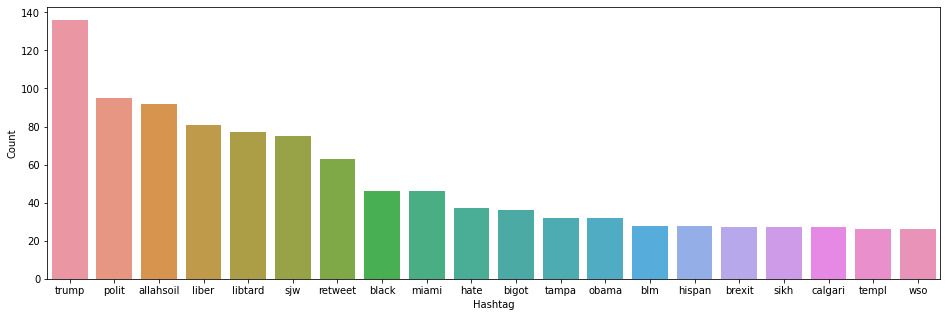

In [26]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag':list(b.keys()), 'Count':list(b.values())})

#selecting top 20 most frequent hashtags
e=e.nlargest(columns="Count", n=20)

plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x="Hashtag", y="Count")

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [28]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [29]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [30]:
#Word2vec model

In [31]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
#tokenizing

model_w2v = gensim.models.Word2Vec(tokenized_tweet, 
                                   vector_size=200, #desired no. of features/independent variable
                                   window=5, #context window size
                                   min_count=2, 
                                   sg=1, # 1 for skip-gram model
                                   hs=0, 
                                   negative=10, #for negative sampling
                                   workers=2, #no. of cores
                                   seed=34
                                  )

model_w2v.train(tokenized_tweet, total_examples=len(combi['tidy_tweet']), epochs=20)

(6510203, 7536020)

In [32]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.554060161113739),
 ('#avocado', 0.5428135991096497),
 ('melani', 0.5378034710884094),
 ('cookout', 0.5336341857910156),
 ('fav', 0.5330348014831543),
 ('spinach', 0.5324689149856567),
 ('#biall', 0.5323979258537292),
 ('chili', 0.5266793966293335),
 ('aladdin', 0.5252482891082764),
 ('#cellar', 0.5205963850021362)]

In [33]:
model_w2v.wv.most_similar(positive="trump")

[('donald', 0.5589235424995422),
 ('#delegaterevolt', 0.5423633456230164),
 ('phoni', 0.538251519203186),
 ('unstabl', 0.5191134810447693),
 ('melo', 0.5182967782020569),
 ('jibe', 0.5182859301567078),
 ('potu', 0.5178533792495728),
 ('businessman', 0.5170609354972839),
 ('tomlin', 0.5159001350402832),
 ('unfavor', 0.5031294226646423)]

In [34]:
model_w2v.wv['food']

array([ 0.19154331, -0.36862433,  0.4901971 , -0.39276767, -0.03618601,
       -0.08077357,  0.12831704, -1.0205473 , -0.407965  , -1.273426  ,
        0.0173347 ,  0.17318147, -0.15567172,  0.20973109, -0.49847165,
        0.25947616,  0.17181805,  0.16929178, -0.08161719, -0.43011668,
       -0.43191963,  1.021178  , -0.1630859 ,  0.8966964 , -0.30735412,
       -0.03882431, -0.38171566, -0.12250962,  0.04757973,  0.43317983,
        0.47422603, -0.7132642 ,  0.61195576,  0.25207463,  0.1307319 ,
        0.10558204,  0.38114116,  0.24626926,  0.5723296 , -0.43808267,
       -0.55114156,  0.22784224, -0.24640344,  0.84791416, -0.00186447,
       -0.20402925,  0.01777317,  0.4860188 , -1.285747  , -0.00624543,
       -0.11380362, -0.64755297,  0.40141162,  0.50717247,  0.414475  ,
       -0.06265438,  0.19918655,  0.17171082,  0.17456074,  0.13379502,
        0.07992098, -0.20510034,  0.50558347, -0.17676404, -0.4679169 ,
       -0.05670214,  0.01136569,  0.03001979,  0.29614952,  0.34

In [35]:
len(model_w2v.wv['food'])

200

In [36]:
def word_vector(tokens,size):
    vec = np.zeros(size).reshape((1,size))
    count=0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: #handling the case where the token is not in vocabulary     
            continue
    if count != 0:
        vec /= count
    return vec
            

In [37]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:]= word_vector(tokenized_tweet[i],200)
    wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

In [38]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [39]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

In [40]:
labeled_tweets = add_label(tokenized_tweet)

In [41]:
labeled_tweets[:6]

[TaggedDocument(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 TaggedDocument(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 TaggedDocument(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [42]:
model_d2v = gensim.models.Doc2Vec(
    dm=1, #dm=1  for 'distributed memory' mode
    dm_mean=1, #dm=1 for using mean of the context word vectors
    vector_size=200, #no. of desired features
    window=5, #width of the context window
    negative=7, #if>0 then negative sampling will be used
    min_count=5, #Ignores all words with total frequency lower than 2
    workers=3, #no. of cores
    alpha=0.1, #learning rate
    seed=23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples=len(combi['tidy_tweet']), epochs=15)

100%|██████████| 49159/49159 [00:00<00:00, 1927763.40it/s]


In [43]:
docvec_arrays = np.zeros((len(tokenized_tweet),200))
for i in range (len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)

docvec_df.shape

(49159, 200)

In [44]:
#Logistic Regression
#bag of words feature

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [46]:
#Extracting train & test BoW features
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

#splitting data into training & validation set

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

In [47]:
lreg =LogisticRegression()
#training the model
lreg.fit(xtrain_bow, ytrain)

prediction = lreg.predict_proba(xvalid_bow)  #predicting on the validation set

prediction_int = prediction[:,1]>=0.3  #if prediction is greater than or equal to 0.3 than 1 else 0

prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) #calculate f1 score for the validation set

0.5303408146300915

In [48]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1]>=0.3
test_pred_int = test_pred_int.astype(np.int)

test['label']= test_pred_int 
submission = test[['id','label']]

submission.to_csv('sub_lreg_bow.csv', index=False)  #writing data into a csv file

In [49]:
#TFIDF features

In [50]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [51]:
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.5451327433628319

In [52]:
#Word2Vec Feature

In [53]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [54]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.6195732155997056

In [55]:
#Doc2Vec feature

In [56]:
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

In [57]:
lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.3783783783783784

In [58]:
#Support Vector Machine
#Bag-Of-Words Feature

In [59]:
from sklearn import svm

In [60]:
svc = svm.SVC(kernel='linear', C=1, 
              probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.5102040816326531

In [61]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

test['label'] = test_pred_int
submission=test[['id','label']]
submission.to_csv('sub_svm_bow.csv', index=False)

In [62]:
#TFIDF

In [63]:
svc = svm.SVC(kernel='linear', C=1, 
              probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.5100182149362478

In [64]:
#Word2Vec

In [65]:
svc = svm.SVC(kernel='linear', C=1, 
              probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.6101960784313725

In [66]:
#Doc2Vec

In [67]:
svc = svm.SVC(kernel='linear', C=1, 
              probability=True).fit(xtrain_d2v, ytrain)

prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.16605616605616602

In [68]:
#RandomForest
#BagofWords

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf = RandomForestClassifier(
    n_estimators=400, random_state=11).fit(
    xtrain_bow, ytrain)

prediction = rf.predict(xvalid_bow) #validation score 
f1_score(yvalid, prediction)

0.5529225908372828

In [71]:
test_pred = rf.predict(test_bow)
test['label']= test_pred

submission = test[['id', 'label']]
submission.to_csv('sub_rf_bow.csv', index=False)

In [72]:
#TFIDF

In [73]:
rf = RandomForestClassifier(
    n_estimators=400, random_state=11).fit(
    xtrain_tfidf, ytrain)

prediction = rf.predict(xvalid_tfidf) #validation score 
f1_score(yvalid, prediction)

0.562152133580705

In [74]:
#word2vec

In [75]:
rf = RandomForestClassifier(
    n_estimators=400, random_state=11).fit(
    xtrain_w2v, ytrain)

prediction = rf.predict(xvalid_w2v) #validation score 
f1_score(yvalid, prediction)

0.5216473072861669

In [76]:
#Doc2Vec

In [77]:
rf = RandomForestClassifier(
    n_estimators=400, random_state=11).fit(
    xtrain_d2v, ytrain)

prediction = rf.predict(xvalid_d2v) #validation score 
f1_score(yvalid, prediction)

0.0594059405940594

In [78]:
from xgboost import XGBClassifier
#XGBoost
#bow feature

In [79]:
xgb_model = XGBClassifier(max_depth=6,
    n_estimators=1000).fit(
    xtrain_bow, ytrain)

prediction = xgb_model.predict(xvalid_bow) #validation score 
f1_score(yvalid, prediction)

0.5247706422018349

In [80]:
test_pred = xgb_model.predict(test_bow)
test['label']= test_pred

submission = test[['id', 'label']]
submission.to_csv('sub_xgb_bow.csv', index=False)

In [81]:
#TFIDF

In [82]:
xgb_model = XGBClassifier(max_depth=6,
    n_estimators=1000).fit(
    xtrain_tfidf, ytrain)

prediction = xgb_model.predict(xvalid_tfidf) #validation score 
f1_score(yvalid, prediction)

0.5394265232974911

In [83]:
#Word2Vec

In [84]:
xgb_model = XGBClassifier(max_depth=6,
    n_estimators=1000, nthread=3).fit(
    xtrain_w2v, ytrain)

prediction = xgb_model.predict(xvalid_w2v) #validation score 
f1_score(yvalid, prediction)

0.6684444444444444

In [85]:
#Doc2Vec

In [86]:
xgb_model = XGBClassifier(max_depth=6,
    n_estimators=1000, nthread=3).fit(
    xtrain_d2v, ytrain)

prediction = xgb_model.predict(xvalid_d2v) #validation score 
f1_score(yvalid, prediction)

0.3564356435643564

In [87]:
#Fine tuning XGBoost + Word2vec as it has highest f1score

In [88]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import f1_score

In [89]:
dtrain = xgb.DMatrix(xtrain_w2v, label = ytrain)
dvalid = xgb.DMatrix(xvalid_w2v, label = yvalid)

dtest = xgb.DMatrix(test_w2v)


In [90]:
def custom_metric(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds>= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

In [91]:
#parameters that we are going to tune

params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight':1,
    'eta':0.3,
    'subsample':1,
    'colsample_bytree':1,
    'eval_metric': 'logloss'
}

In [92]:
#Tuning max_depth & min_child_weight

In [93]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
    for min_child_weight in range(5,8)
]

max_f1 = 0 #initialising with 0
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                                max_depth,
                                min_child_weight))
    
    #update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    #cross-validation
    cv_results = xgb.cv(params,
                       dtrain,
                       num_boost_round = 200,
                       maximize= True,
                       seed=16,
                       nfold=5,
                       early_stopping_rounds=10,
                        custom_metric=custom_metric,
                        )

    #Finding best f1 score

    mean_f1 = cv_results['test-f1_score-mean'].max()

    boost_rounds = cv_results['test-f1_score-mean'].argmax()

    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))

    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth, min_child_weight)
    
print("Best params: {}, {}, F1 score: {}".format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=5
	F1 Score 0.6731014 for 76 rounds
CV with max_depth=6, min_child_weight=6
	F1 Score 0.681646 for 76 rounds
CV with max_depth=6, min_child_weight=7
	F1 Score 0.6876132000000001 for 99 rounds
CV with max_depth=7, min_child_weight=5
	F1 Score 0.6812276 for 63 rounds
CV with max_depth=7, min_child_weight=6
	F1 Score 0.6803636 for 44 rounds
CV with max_depth=7, min_child_weight=7
	F1 Score 0.6814108 for 69 rounds
CV with max_depth=8, min_child_weight=5
	F1 Score 0.6807876 for 53 rounds
CV with max_depth=8, min_child_weight=6
	F1 Score 0.6853451999999999 for 66 rounds
CV with max_depth=8, min_child_weight=7
	F1 Score 0.6881978 for 56 rounds
CV with max_depth=9, min_child_weight=5
	F1 Score 0.6892232 for 93 rounds
CV with max_depth=9, min_child_weight=6
	F1 Score 0.6812198 for 48 rounds
CV with max_depth=9, min_child_weight=7
	F1 Score 0.6848322 for 58 rounds
Best params: 9, 5, F1 score: 0.6892232


In [94]:
#updating max_depth & min_child_weight parameters

params['max_depth']=8
params['min_child_weight'] = 5

In [95]:
#Tuning subsample and colsample

In [96]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)]
]

max_f1 = 0
best_params = None
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample_bytree={}".format(
                                subsample,
                                colsample))
    
    #update our parameters
    params['colsample_bytree'] = colsample
    params['subsample'] = subsample
    

    cv_results = xgb.cv(params,
                       dtrain, 
                        custom_metric = custom_metric,
                       num_boost_round = 200,
                       maximize= True,
                       seed=16,
                       nfold=5,
                       early_stopping_rounds=10
                        )

    #Finding best f1 score

    mean_f1 = cv_results['test-f1_score-mean'].max()

    boost_rounds = cv_results['test-f1_score-mean'].argmax()

    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))

    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample)
    
print("Best params: {}, {}, F1 score: {}".format(
                                            best_params[0],
                                            best_params[1],
                                            max_f1))

CV with subsample=0.5, colsample_bytree=0.5
	F1 Score 0.6438648 for 28 rounds
CV with subsample=0.5, colsample_bytree=0.6
	F1 Score 0.655105 for 37 rounds
CV with subsample=0.5, colsample_bytree=0.7
	F1 Score 0.6576951999999999 for 51 rounds
CV with subsample=0.5, colsample_bytree=0.8
	F1 Score 0.6733198 for 88 rounds
CV with subsample=0.5, colsample_bytree=0.9
	F1 Score 0.6601206 for 53 rounds
CV with subsample=0.6, colsample_bytree=0.5
	F1 Score 0.6683807999999999 for 58 rounds
CV with subsample=0.6, colsample_bytree=0.6
	F1 Score 0.6670918 for 40 rounds
CV with subsample=0.6, colsample_bytree=0.7
	F1 Score 0.6706179999999999 for 42 rounds
CV with subsample=0.6, colsample_bytree=0.8
	F1 Score 0.6720889999999999 for 55 rounds
CV with subsample=0.6, colsample_bytree=0.9
	F1 Score 0.6785718000000001 for 71 rounds
CV with subsample=0.7, colsample_bytree=0.5
	F1 Score 0.6724662 for 58 rounds
CV with subsample=0.7, colsample_bytree=0.6
	F1 Score 0.6584206000000001 for 28 rounds
CV with sub

In [97]:
#updating subsample and colsample
params['subsample'] = .8
params['colsample_bytree'] = .6

In [98]:
#tuning learning rate

max_f1 = 0 
best_params = None
for eta in[.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    
    #update ETA
    params['eta'] = eta
    
    #Run CV
    cv_results = xgb.cv(params,
                       dtrain,
                       num_boost_round = 1000,
                       maximize= True,
                       seed=16,
                       nfold=5,
                       early_stopping_rounds=10,
                        custom_metric=custom_metric,
                        )

    #Finding best f1 score

    mean_f1 = cv_results['test-f1_score-mean'].max()

    boost_rounds = cv_results['test-f1_score-mean'].argmax()

    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))

    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta
    
print("Best params: {}, F1 score: {}".format(best_params, max_f1))

CV with eta=0.3
	F1 Score 0.68036 for 88 rounds
CV with eta=0.2
	F1 Score 0.6800816 for 62 rounds
CV with eta=0.1
	F1 Score 0.6803962 for 82 rounds
CV with eta=0.05
	F1 Score 0.6386554 for 39 rounds
CV with eta=0.01
	F1 Score 0.1302024 for 0 rounds
CV with eta=0.005
	F1 Score 0.1302024 for 0 rounds
Best params: 0.1, F1 score: 0.6803962


In [102]:
params['eta']= 0.1

In [103]:
params

{'objective': 'binary:logistic',
 'max_depth': 8,
 'min_child_weight': 5,
 'eta': 0.1,
 'subsample': 0.8,
 'colsample_bytree': 0.6,
 'eval_metric': 'logloss'}

In [105]:
xgb_model = xgb.train(
            params,
            dtrain,
            custom_metric= custom_metric,
            num_boost_round=1000,
            maximize= True,
            evals=[(dvalid, "validation")],
            early_stopping_rounds=10)

[0]	validation-logloss:0.61626	validation-f1_score:0.13317
[1]	validation-logloss:0.55255	validation-f1_score:0.13317
[2]	validation-logloss:0.49983	validation-f1_score:0.13317
[3]	validation-logloss:0.45466	validation-f1_score:0.13317
[4]	validation-logloss:0.41637	validation-f1_score:0.13301
[5]	validation-logloss:0.38380	validation-f1_score:0.36527
[6]	validation-logloss:0.35437	validation-f1_score:0.46031
[7]	validation-logloss:0.32889	validation-f1_score:0.51758
[8]	validation-logloss:0.30691	validation-f1_score:0.54749
[9]	validation-logloss:0.28732	validation-f1_score:0.57216
[10]	validation-logloss:0.27026	validation-f1_score:0.58272
[11]	validation-logloss:0.25511	validation-f1_score:0.58848
[12]	validation-logloss:0.24181	validation-f1_score:0.58891
[13]	validation-logloss:0.22995	validation-f1_score:0.59779
[14]	validation-logloss:0.21945	validation-f1_score:0.60315
[15]	validation-logloss:0.21025	validation-f1_score:0.60136
[16]	validation-logloss:0.20220	validation-f1_scor

In [ ]:
#BEST ITERATION [85]	validation-logloss:0.12032	validation-f1_score:0.67816

In [106]:
test_pred = xgb_model.predict(dtest)

test['label']= (test_pred >= 0.3).astype(np.int)

submission = test[['id', 'label']]
submission.to_csv('sub_xgb_w2v_finetuned.csv', index=False)

In [99]:
#Comparing all the F1 scores of different features

In [100]:
#After comparing qw can see that XGBoost Word2vec has highest f1score
#Word2vec feature has highest score among other features that shows it's the best model for this problem